In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
function make_series(x1, x2; a=1.4, b=0.3, T=100)
    X = [x1, x2]
    for t in 1:T
        xt = 1 - a * X[end] ^ 2 + b * X[end-1]
        push!(X, xt)
    end
    X
end

make_series (generic function with 1 method)

### 例1

$x_1=0.1, x_2=0.1, a=1.4, b=0.3$ で生成した系列 (図1.1)

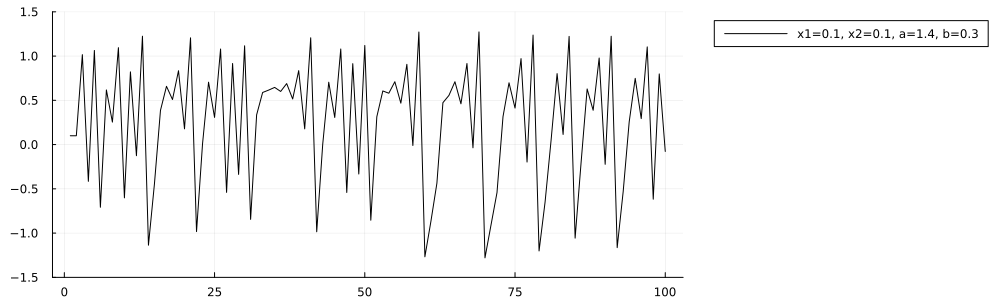

In [3]:
seq1 = make_series(0.1, 0.1; T=98);

f = plot(legend=:outertopright, size=(1000, 300), ylims=(-1.5, 1.5))
plot!(f, seq1, lw=1, color=:black, label="x1=0.1, x2=0.1, a=1.4, b=0.3")

### 例2

- 系列のリターンプロット (図1.2(b)、図1.2(c))

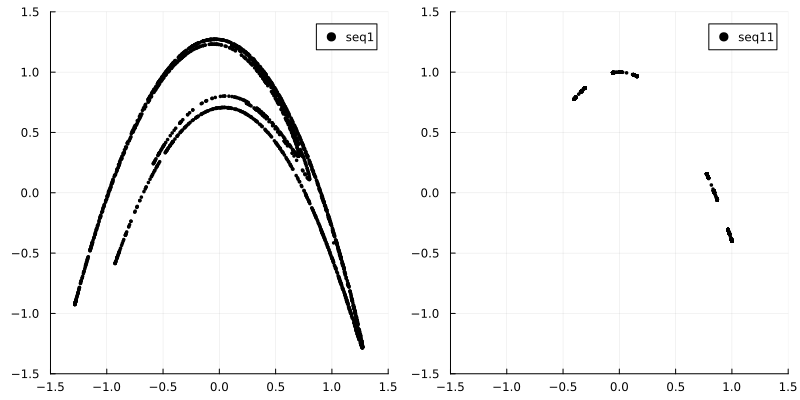

In [4]:
seq1 = make_series(0.1, 0.1; T=2000);
seq11 = make_series(0.1, 0.1; T=2000, b=0.0);

lims = (-1.5, 1.5)
f1 = scatter(seq1[3:end-1], seq1[4:end], size=(400, 400), ms=2, color=:black, xlims=lims, ylims=lims, label="seq1")
f2 = scatter(seq11[3:end-1], seq11[4:end], size=(400, 400), ms=2, color=:black, xlims=lims, ylims=lims, label="seq11")
plot!(f1, f2, size=(800, 400))

### 例3

2つの系列の可視化 (図1.3)
- $x_1=0.1, x_2=0.1, a=1.4, b=0.3$ 
- $x_1=0.1, x_2=0.1001, a=1.4, b=0.3$ 

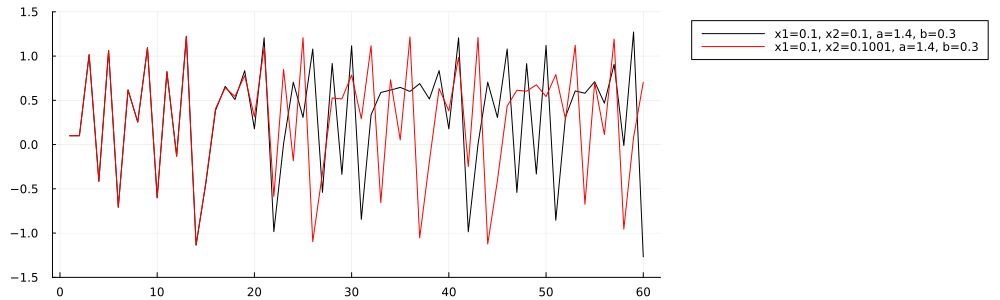

In [5]:
seq1 = make_series(0.1, 0.1; T=58);
seq2 = make_series(0.1, 0.1001; T=58);

f = plot(legend=:outertopright, size=(1000, 300), ylims=(-1.5, 1.5))
plot!(f, seq1, lw=1, color=:black, label="x1=0.1, x2=0.1, a=1.4, b=0.3")
plot!(f, seq2, lw=1, color=:red, label="x1=0.1, x2=0.1001, a=1.4, b=0.3")

2つの系列の差 (図1.4)
- log(0)が怪しいので系列を[3:end]で指定

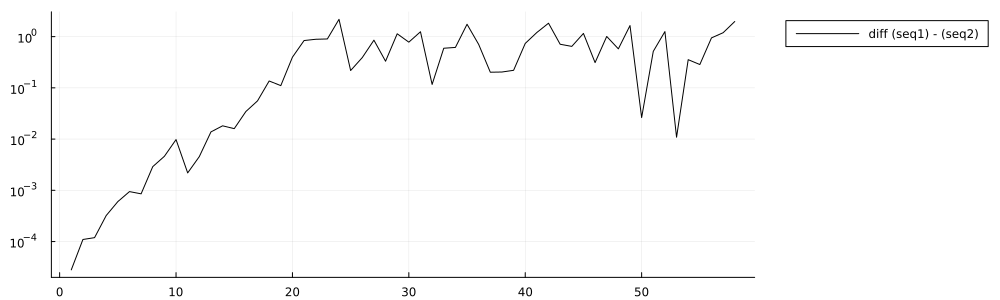

In [6]:
f = plot(legend=:outertopright, size=(1000, 300))
plot!(f, (abs.(seq1 .- seq2))[3:end], lw=1, color=:black, label="diff (seq1) - (seq2)", yscale=:log10)

### 例4. 分岐図

ここでは簡単のために $T=500$ の系列を作り、末尾の長さ$L=100$の部分列に含まれる数値を使って描く。  
ちょっと数値的に（？）変なところがあるけど、そこそこそれっぽい図が描ける。

In [7]:
f = plot(size=(500, 500), ylim=(-1.5, 1.5))

# b=0.3で固定し、aの探索は0.0から1.5まで0.01刻みとする
T = 500
L = 100
for a in range(0.0, 1.5; step=0.001)
    seq_a = make_series(0.1, 0.1; a=a, b=0.3, T=T-2)
    
    # plot Y
    plot_y = collect(Set(seq_a[end-L:end]))
    plot_x = [a for _ in 1:length(plot_y)]
    
    scatter!(f, plot_x, plot_y, ms=1, color=:black, label=nothing)
end

f